In [1]:
# Victor Z and David Cole
# UW-Madison 2024
# Modeling wind speed using weibull RV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.special import gamma

# visualize data
x = np.arange(0.5, 20, 1)
w = np.array([2.75, 7.8, 11.6, 13.79, 14.20, 13.15, 11.14, 8.72, 6.34, 4.30, 2.73, 1.62,
              0.91, 0.48, 0.24, 0.11, 0.05, 0.02, 0.01, 0.001]) / 100
xx = np.linspace(0, 19, 1000)

# parameters of Weibull pdf model
scale = 6  # m/s
shape = 2  # -

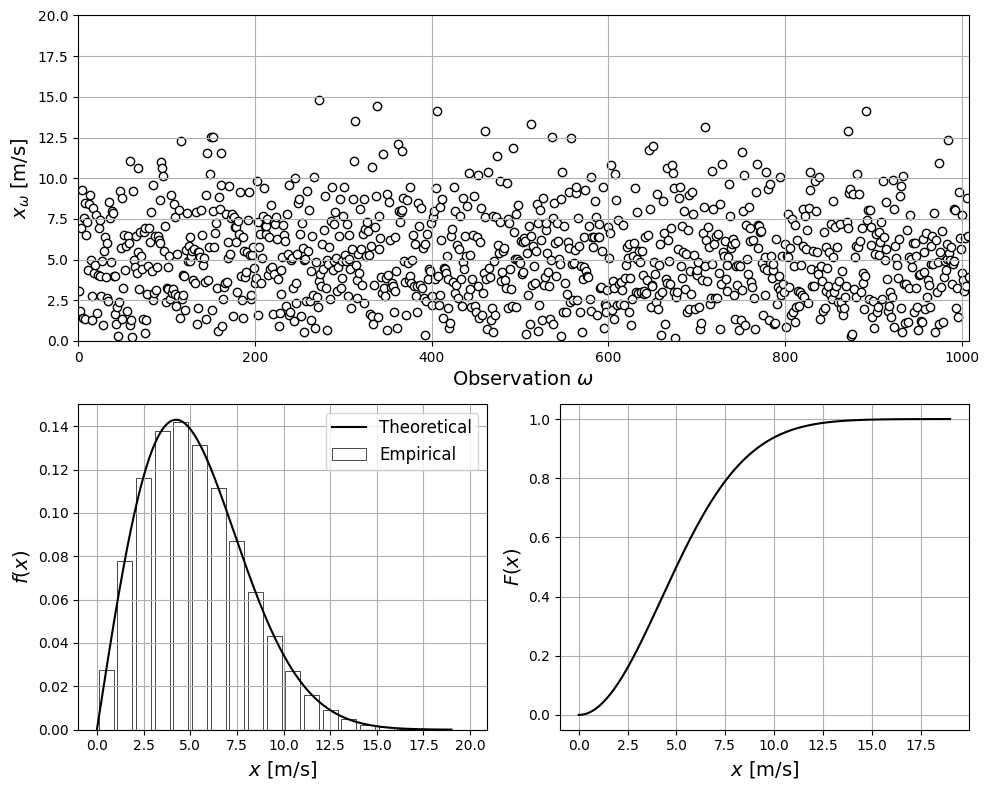

In [3]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 2)

N = 24 * 7 * 6
xo = np.arange(1, N + 1)
weibull_samples = weibull_min.rvs(shape, scale=scale, size=N)

ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(xo, weibull_samples, edgecolor='black', facecolor='white')
ax1.set_xlim([0, N])
ax1.set_ylim([0, 20])
ax1.set_xlabel('Observation $\omega$', fontsize=14)
ax1.set_ylabel('$x_\omega$ [m/s]', fontsize=14)
ax1.grid(True)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(xx, weibull_min.pdf(xx, shape, scale=scale), 'black', linewidth=1.5)
ax2.bar(x, w, edgecolor='black', facecolor='white', linewidth=0.5)
ax2.set_xlabel('$x$ [m/s]', fontsize=14)
ax2.set_ylabel('$f(x)$', fontsize=14)
ax2.grid(True)
ax2.legend(['Theoretical', 'Empirical'], fontsize=12)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(xx, weibull_min.cdf(xx, shape, scale=scale), 'black', linewidth=1.5)
ax3.set_xlabel('$x$ [m/s]', fontsize=14)
ax3.set_ylabel('$F(x)$', fontsize=14)
ax3.grid(True)

plt.tight_layout()
plt.show()

In [4]:
# mean
m = weibull_min.mean(shape, scale=scale)
print(f"Mean: {m}")

Mean: 5.317361552716548


In [5]:
# mode
mo = scale * ((shape - 1) / shape) ** (1 / shape)
print(f"Mode: {mo}")

Mode: 4.242640687119286


In [6]:
# probability 10-20 m/s
p = weibull_min.cdf(20, shape, scale=scale) - weibull_min.cdf(10, shape, scale=scale)
print(f"Probability 10-20 m/s: {p}")

Probability 10-20 m/s: 0.06216157868359151
